# Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Load and Explore Data

In [82]:
df=pd.read_csv('train.csv')

In [83]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Dataset Info 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop unnecessary column

In [85]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [86]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Encoding object class 

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le=LabelEncoder()

In [89]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [90]:
df['Sex']=le.fit_transform(df['Sex'])

In [91]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [92]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
df['Embarked'].isnull().sum()

2

In [94]:
df['Embarked'].mode()

0    S
dtype: object

In [95]:
df['Embarked'].mode()[0]

'S'

In [96]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [97]:
df['Embarked'].isnull().sum()

0

In [98]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [101]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [103]:
x=df.drop(['Survived'],axis=1)

In [104]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [105]:
y=df['Survived']

In [106]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#  Correlation between Feature


In [107]:
corr=df.corr()

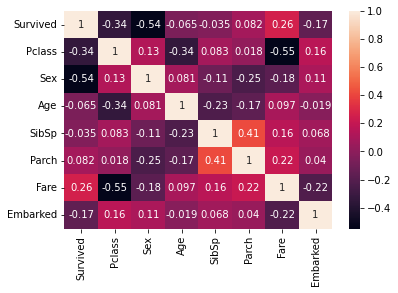

In [108]:
sns.heatmap(corr,annot=True)
plt.show()

###  Train test split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [111]:
x_train.shape

(623, 7)

In [112]:
y_train.shape

(623,)

# Model Train and then Prediction

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
from sklearn.svm import SVC

In [118]:
from xgboost import XGBClassifier

In [119]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,r2_score

In [120]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [121]:
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay

In [122]:
model={
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'LogisticRegression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(probability=True),
    'XGB':XGBClassifier(use_label_encoder=False,eval_metric='logloss')
}

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:45:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


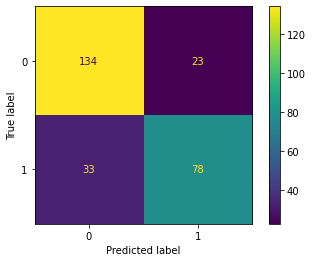

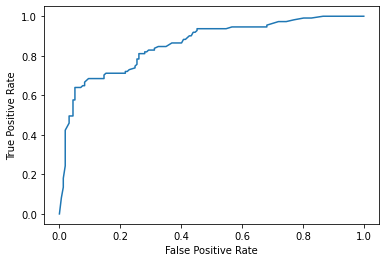

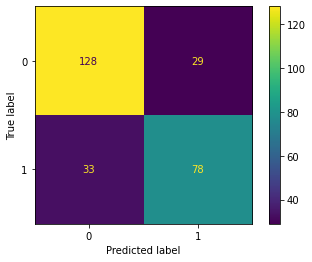

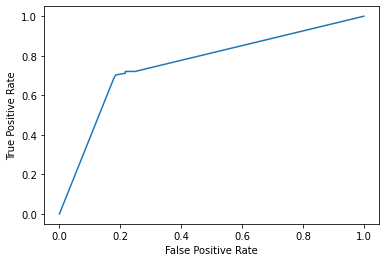

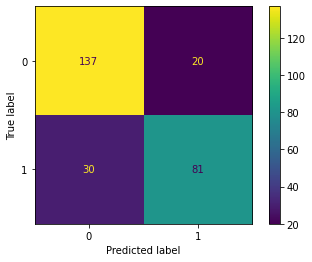

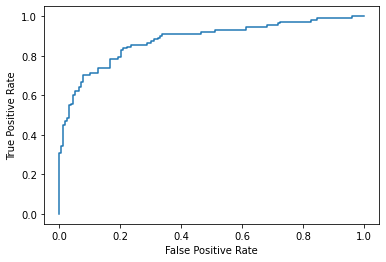

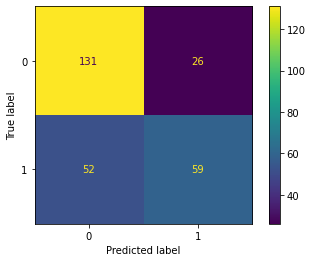

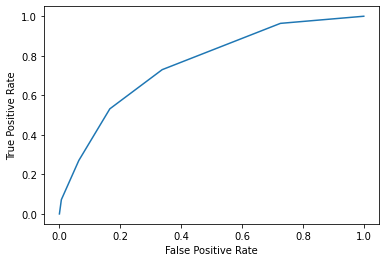

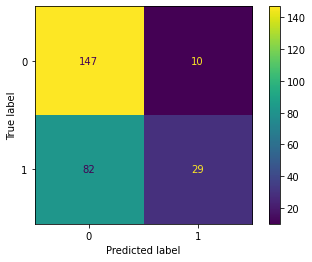

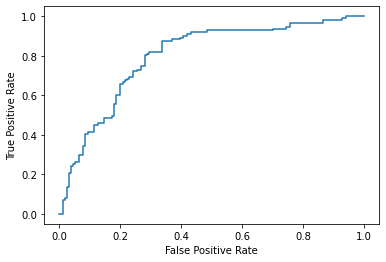

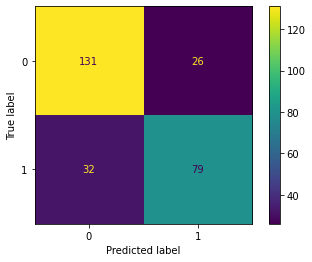

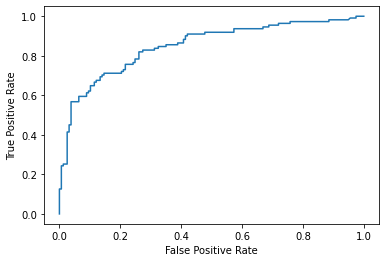

In [123]:
result={}
for name,m in model.items():
    m.fit(x_train,y_train)
    y_predict=m.predict(x_test)
    y_prob=m.predict_proba(x_test)[:,1]
    #print(y_prob,"\n\n\n")
    result[name]={
        'Accuracy':accuracy_score(y_test,y_predict),
        'F1 Score':f1_score(y_test,y_predict),
        'Precision':precision_score(y_test,y_predict),
        'Recall':recall_score(y_test,y_predict),
        'Roc-Auc':roc_auc_score(y_test,y_prob)
    }
    #print(confusion_matrix(y_test,y_predict))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict)).plot()
    fpr,tpr,_=roc_curve(y_test,y_prob)
    RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

In [124]:
results_df=pd.DataFrame(result)

In [125]:
results_df

,RandomForest,DecisionTree,LogisticRegression,KNN,SVC,XGB
Accuracy,0.791045,0.768657,0.813433,0.708955,0.656716,0.783582
F1 Score,0.735849,0.715596,0.764151,0.602041,0.386667,0.731481
Precision,0.772277,0.728972,0.801980,0.694118,0.743590,0.752381
Recall,0.702703,0.702703,0.729730,0.531532,0.261261,0.711712
Roc-Auc,0.859500,0.757589,0.879842,0.757331,0.798187,0.849687


In [126]:
results_df=results_df.T

In [127]:
results_df

,Accuracy,F1 Score,Precision,Recall,Roc-Auc
RandomForest,0.791045,0.735849,0.772277,0.702703,0.859500
DecisionTree,0.768657,0.715596,0.728972,0.702703,0.757589
LogisticRegression,0.813433,0.764151,0.801980,0.729730,0.879842
KNN,0.708955,0.602041,0.694118,0.531532,0.757331
SVC,0.656716,0.386667,0.743590,0.261261,0.798187
XGB,0.783582,0.731481,0.752381,0.711712,0.849687


In [128]:
results_df.sort_values(by='F1 Score',ascending=False)

,Accuracy,F1 Score,Precision,Recall,Roc-Auc
LogisticRegression,0.813433,0.764151,0.801980,0.729730,0.879842
RandomForest,0.791045,0.735849,0.772277,0.702703,0.859500
XGB,0.783582,0.731481,0.752381,0.711712,0.849687
DecisionTree,0.768657,0.715596,0.728972,0.702703,0.757589
KNN,0.708955,0.602041,0.694118,0.531532,0.757331
SVC,0.656716,0.386667,0.743590,0.261261,0.798187


In [129]:
results_df

,Accuracy,F1 Score,Precision,Recall,Roc-Auc
RandomForest,0.791045,0.735849,0.772277,0.702703,0.859500
DecisionTree,0.768657,0.715596,0.728972,0.702703,0.757589
LogisticRegression,0.813433,0.764151,0.801980,0.729730,0.879842
KNN,0.708955,0.602041,0.694118,0.531532,0.757331
SVC,0.656716,0.386667,0.743590,0.261261,0.798187
XGB,0.783582,0.731481,0.752381,0.711712,0.849687


In [130]:
results_df.sort_values(by='F1 Score',ascending=False,inplace=True)

In [131]:
results_df

,Accuracy,F1 Score,Precision,Recall,Roc-Auc
LogisticRegression,0.813433,0.764151,0.801980,0.729730,0.879842
RandomForest,0.791045,0.735849,0.772277,0.702703,0.859500
XGB,0.783582,0.731481,0.752381,0.711712,0.849687
DecisionTree,0.768657,0.715596,0.728972,0.702703,0.757589
KNN,0.708955,0.602041,0.694118,0.531532,0.757331
SVC,0.656716,0.386667,0.743590,0.261261,0.798187


# Select Logistic Regression ,train and predict


In [132]:
model1=LogisticRegression(max_iter=1000)


In [133]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [134]:
x['f']=x['SibSp']+x['Parch']

In [135]:
model1.fit(x,y)

LogisticRegression(max_iter=1000)

In [136]:
test=pd.read_csv('test.csv')

In [137]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [138]:
x1=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [139]:
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [140]:
x1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [141]:
x1['Sex']=le.fit_transform(x1['Sex'])

In [142]:
x1['Age'].fillna(x1['Age'].median(),inplace=True)

In [143]:
x1.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,0.636364,29.599282,0.447368,0.392344,35.627188
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.907576
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [144]:
x1['Fare'].median()

14.4542

In [145]:
x1['Fare'].mode()

0    7.75
dtype: float64

In [146]:
x1['Fare'].fillna(x1['Fare'].mode()[0],inplace=True)

In [147]:
x1['f']=x1['SibSp']+x1['Parch']

In [148]:
x1['Embarked']=le.fit_transform(x1['Embarked'])

In [149]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   f         418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [150]:
y_p=model1.predict(x1)

In [151]:
y_p

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
sub_df={
    'PassengerId':test['PassengerId'],
    'Survived':y_p
}

In [159]:
sub_df=pd.DataFrame(sub_df)

In [160]:
sub_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [161]:
sub_df.to_csv('submission.csv',index=False)